# Introduction

Les données du dataset housing concernent la médiane de prix, nombre de chambres, emplacement ... de chaque arrondissement dans Californie. De telle sorte qu'un arrondissement peut contenir de 600 jusqu'à 3000 habitants. Nous allons dans ce notebook explorer, visualiser et trouver des informations relevant à partir de nos données.

# Se familiariser avec les données

## Importer les données et se familiariser avec leurs structures

In [1]:
import pandas as pd 

housing = pd.read_csv('housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

NB:   
- Chaque ligne représente un arrondissement (one district).
- Nous avons 10 colonnes (['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value', 'ocean_proximity'])

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* La colonne `ocean_proximity` a besoin qu'on **change son type** par après (car elle est de type object qui est trop vague).

In [7]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


* On dirait que notre colonne `ocean_proximity` est une colonne qui contient des categories.

#### Découvrir le nombre de catégories qu'on a dans  ocean_proximity

In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Description statistique de nos données

In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* La colonne `total_bedrooms` n'a que **20433** valeurs alors qu'en tout nous avons **20640** ceci veut dire qu'elle contient des valeurs **NaN**.

Remarques:  

* Le prix minimum d'une maison est 14999.
* Le prix maximum est 500001.

## Une première visualisation de nos données

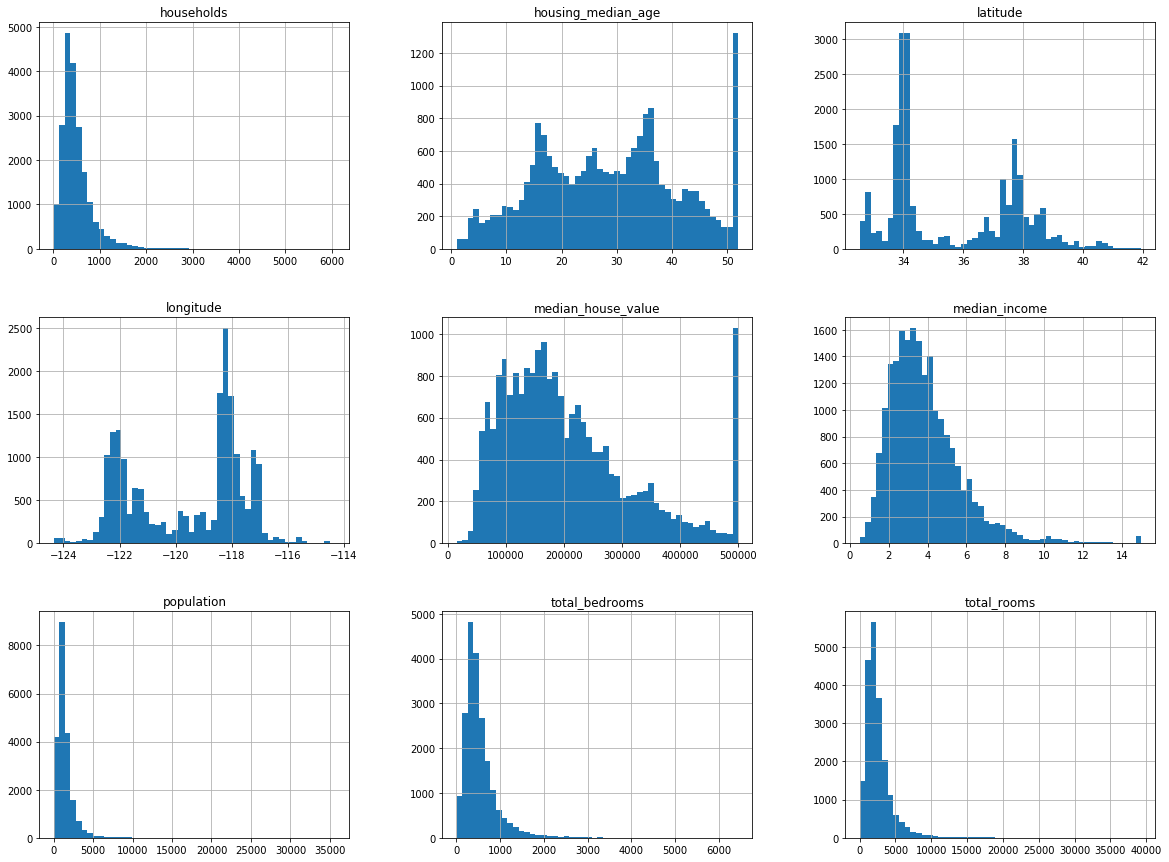

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

### Visualiser les données géographiques

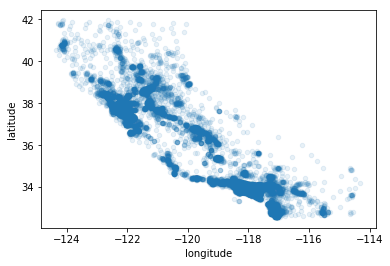

In [16]:
# Repérer les surfaces d'une densité importante (alpha=0.1)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

#### Le prix d'une maison et son emplacement

> Le rayon de chaque cercle représente la population de chaque arrondissement (option s), et la couleur représente le prix (la mediane des prix de maisons) (option c). 
> Une couleur prédéfinie a été utilisé qui est color map (option c) appelée `jet`, qui change du bleu (petite valeurs) au rouge (très grande valeur). 

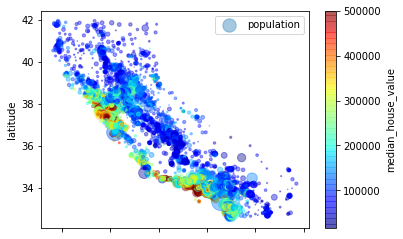

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), 
            colorbar=True )
plt.legend()

On peut remarquer qu'effectivement l'emplacement de la maison joue un role dans son prix. On peut prendre par exemple les maisons se trouvant à la position (longitude ~= 37 et latitude ~= 122 , categorisée NEAR BAY) ont un prix plus élevée. Nous avons aussi quelques emplacements NEAR OCEAN qui ont un prix élevé. Mais ceci ne nous permet pas de généraliser.

#### Correlations

In [20]:
matrice_corr = housing.corr()

**Questions: Y-a-t il une relation entre le prix d'une maison et**
1. le salaire 
2. le nombre de chambres 
3. le nombre de pièces (rooms)
4. son age  
**?**

**Prix et Salaire**

In [23]:
matrice_corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

A travers le resulat au-dessus on peut voir qu'il ya une correlation positive qui s'approche de ~ 1. On peut dire que le prix mediane des maisons augmente avec un bon salaire.

**Rq:**
* La méthode `corr()` ne mesure que les correlations lineaires et il se peut que pour nos données nous ayons des correlations non lineaires c'est pourquoi nous allons utiliser une méthode de Pandas appelée `scatter_matrix` qui va nous dessiner des graphes de chaque valeur numérique avec les valeurs numériques que nous lui fourniront.

C:\Users\sarae\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028608FE4F28>,
      dtype=object)

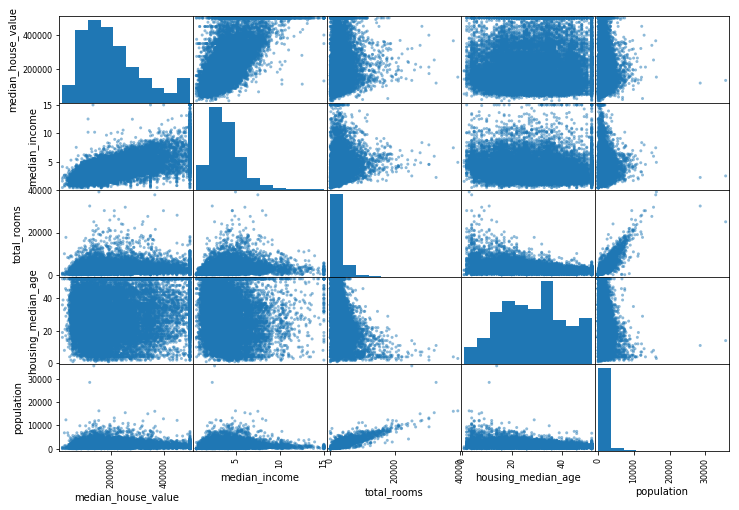

In [24]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", 
              "housing_median_age", "population"]
scatter_matrix(housing[attributes], figsize=(12, 8))

#### Interprétation des graphes

Le graphe qui paraît le plus intéressant est celui du salaire et la valeur médiane du prix de la maison. Voyons ceci un peu de plus près.

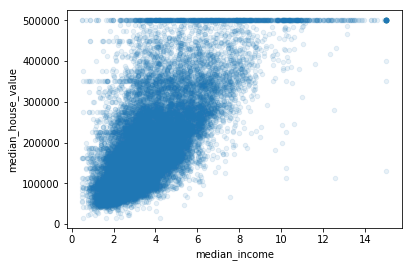

In [25]:
housing.plot(kind='scatter', x="median_income", y='median_house_value', alpha=0.1)

**Conclusion**: Nous pouvons remarquer qu'effectivement le prix d'une maison est haut si le salaire est haut.

**Rq**: On peut voir qu'il y a des lignes horizontales aux alentours de ~360000 et ~280000 et d'autres valeurs, ceci nous pousse à faire un peu le ménage de nos données.

### Création de nouvelles valeurs

In [31]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_househol'] = housing['population']/housing['households']

In [32]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_househol,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467,0.172096


In [33]:
mat_corr = housing.corr()
mat_corr['median_house_value'].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.688075
rooms_per_household        0.151948
total_rooms                0.134153
housing_median_age         0.105623
households                 0.065843
total_bedrooms             0.049686
population_per_househol   -0.023737
population                -0.024650
longitude                 -0.045967
bedrooms_per_household    -0.046739
latitude                  -0.144160
bedrooms_per_room         -0.255880
Name: median_house_value, dtype: float64

**Cc**: On dirait que le nombre de chambres à coucher dans une maison affecte négativement le prix d'une maison. En d'autres terme on peut dire qu'une maison avec un nombre faible de chambres à coucher/chambres est plus chère que les autres maisons. Le nombre de pièces aussi affecte positivement le prix d'une maison ce qui est normal puisque plus la maison est grande plus elle est chère.  

# Data Cleaning

In [80]:
import pandas as pd 

housing = pd.read_csv('housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [81]:
housing.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [85]:
# Remplace les valeurs manquantes par la mediane
median = housing["total_bedrooms"].median()
housing['total_bedrooms'] = housing["total_bedrooms"].fillna(median)

In [86]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [87]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_househol'] = housing['population']/housing['households']

In [88]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_househol
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213794,3.070655
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.065248,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.037151,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175225,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203159,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.240126,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,2.824675,1243.333333


In [89]:
housing['total_bedrooms'].isnull().any()

False

### Outliers

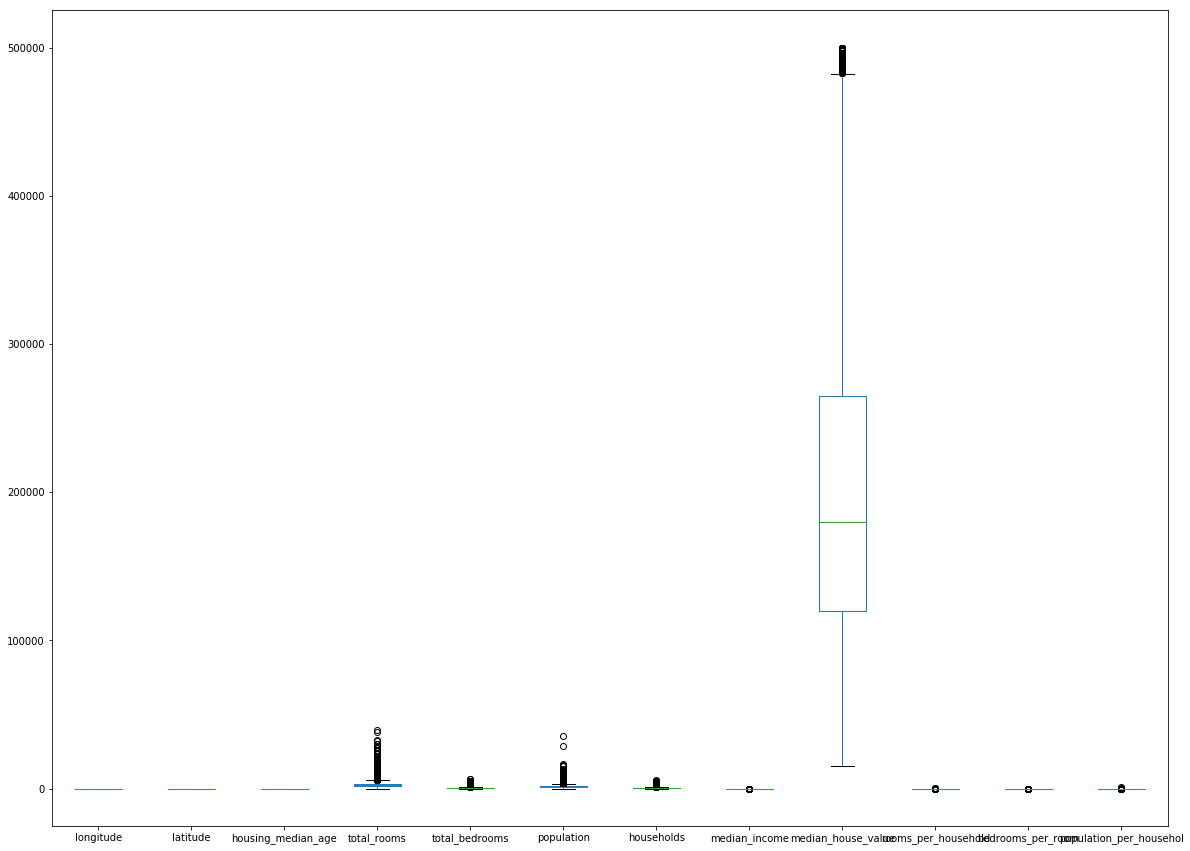

In [100]:
housing.plot(kind='box', figsize=(20,15))

**Rq**: On dirait qu'il y a plusieurs outliers.
Nous allons survoler ces outliers et voir comment s'en occuper.

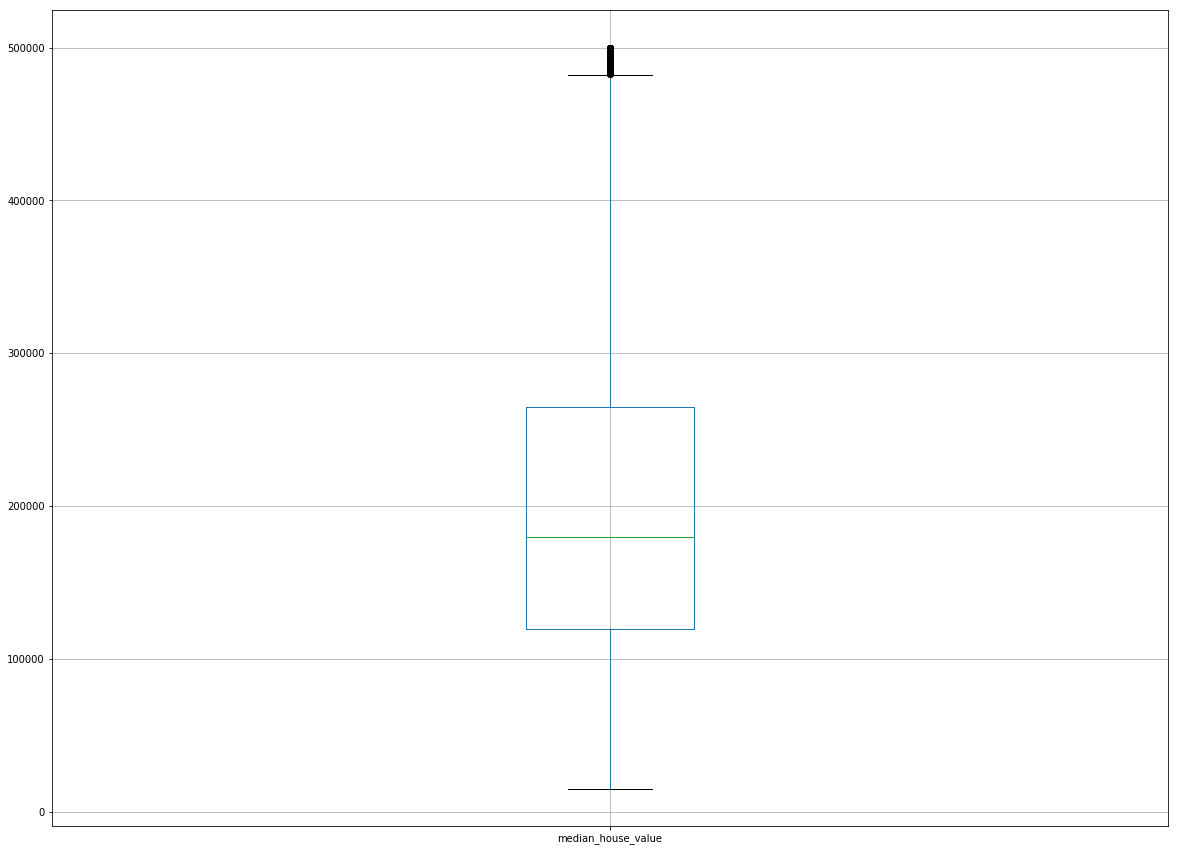

In [95]:
housing.boxplot(column='median_house_value', figsize=(20,15))

In [105]:
housing[housing['median_house_value'] > 500000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_househol
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY,2.929412,0.313253,4.658824
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY,2.436000,0.387521,5.396000
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY,7.794393,0.134892,2.415888
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY,7.512097,0.127214,2.754032
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY,8.282548,0.126756,2.623269
510,-122.22,37.82,39.0,2492.0,310.0,808.0,315.0,11.8603,500001.0,NEAR BAY,7.911111,0.124398,2.565079
511,-122.22,37.82,42.0,2991.0,335.0,1018.0,335.0,13.4990,500001.0,NEAR BAY,8.928358,0.112003,3.038806
512,-122.23,37.82,52.0,3242.0,366.0,1001.0,352.0,12.2138,500001.0,NEAR BAY,9.210227,0.112893,2.843750
514,-122.23,37.82,52.0,3494.0,396.0,1192.0,383.0,12.3804,500001.0,NEAR BAY,9.122715,0.113337,3.112272
517,-122.23,37.82,52.0,1611.0,203.0,556.0,179.0,8.7477,500001.0,NEAR BAY,9.000000,0.126009,3.106145


On dirait que notre colonne `median_house_value` contient des outliers. L'outlier est sous forme du nombre **500001.0** qui est louche puisque cette médiane est commune à toute les arrondissements.

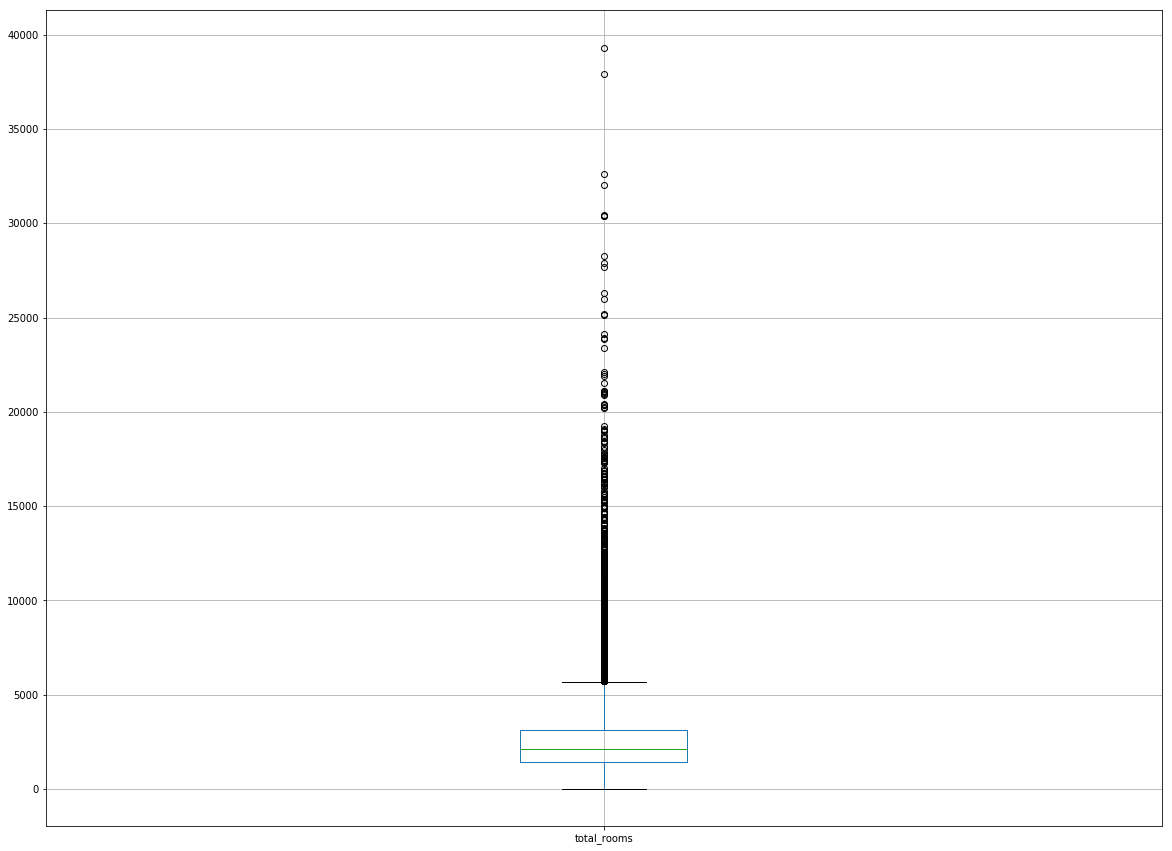

In [108]:
housing.boxplot(column='total_rooms', figsize=(20,15))

In [109]:
housing[housing['total_rooms'] > 5000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_househol
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY,2.294016,0.464815,1.493328
101,-122.25,37.81,28.0,5806.0,1603.0,2563.0,1497.0,3.2177,273400.0,NEAR BAY,3.878424,0.276094,1.712091
104,-122.26,37.81,34.0,5871.0,1914.0,2689.0,1789.0,2.8406,335700.0,NEAR BAY,3.281722,0.326009,1.503074
116,-122.25,37.83,28.0,5022.0,1750.0,2558.0,1661.0,2.4234,218500.0,NEAR BAY,3.023480,0.348467,1.540036
125,-122.22,37.85,28.0,5287.0,1048.0,2031.0,956.0,5.4570,337300.0,NEAR BAY,5.530335,0.198222,2.124477
133,-122.21,37.83,34.0,5065.0,788.0,1627.0,766.0,6.8976,333300.0,NEAR BAY,6.612272,0.155577,2.124021
185,-122.23,37.79,43.0,5963.0,1344.0,4367.0,1231.0,2.1917,112800.0,NEAR BAY,4.844029,0.225390,3.547522
283,-122.16,37.79,22.0,12842.0,2048.0,4985.0,1967.0,5.9849,371000.0,NEAR BAY,6.528724,0.159477,2.534316
391,-122.30,37.90,15.0,5083.0,1212.0,2420.0,1146.0,4.5824,256100.0,NEAR BAY,4.435428,0.238442,2.111693


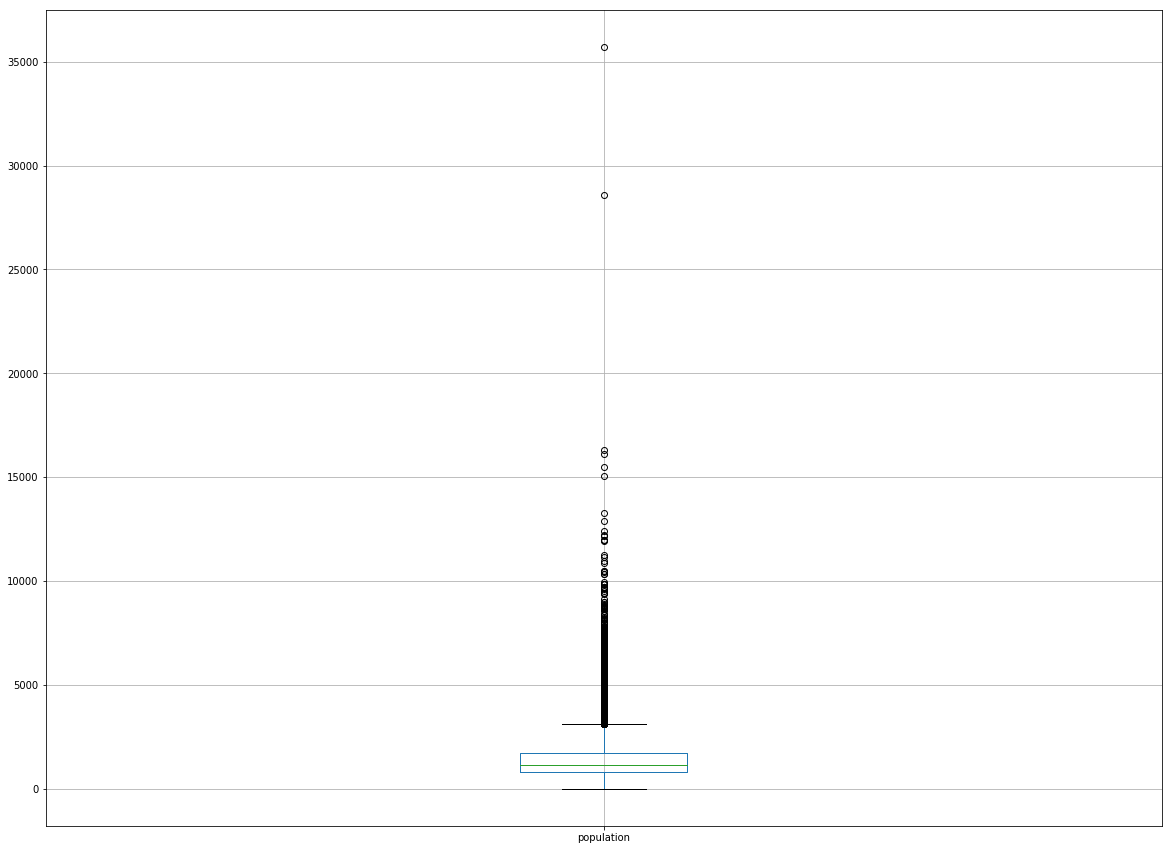

In [110]:
housing.boxplot(column='population', figsize=(20,15))

In [111]:
housing[housing['population'] > 15000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_househol
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN,6.347327,0.165034,3.070693
6066,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,339700.0,<1H OCEAN,6.802554,0.150866,3.692780
9880,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN,5.364518,0.197536,4.696810
10309,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN,7.311043,0.144213,3.106957
13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND,7.338559,0.157935,3.043113
15360,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0,<1H OCEAN,5.270497,0.191725,7.482072


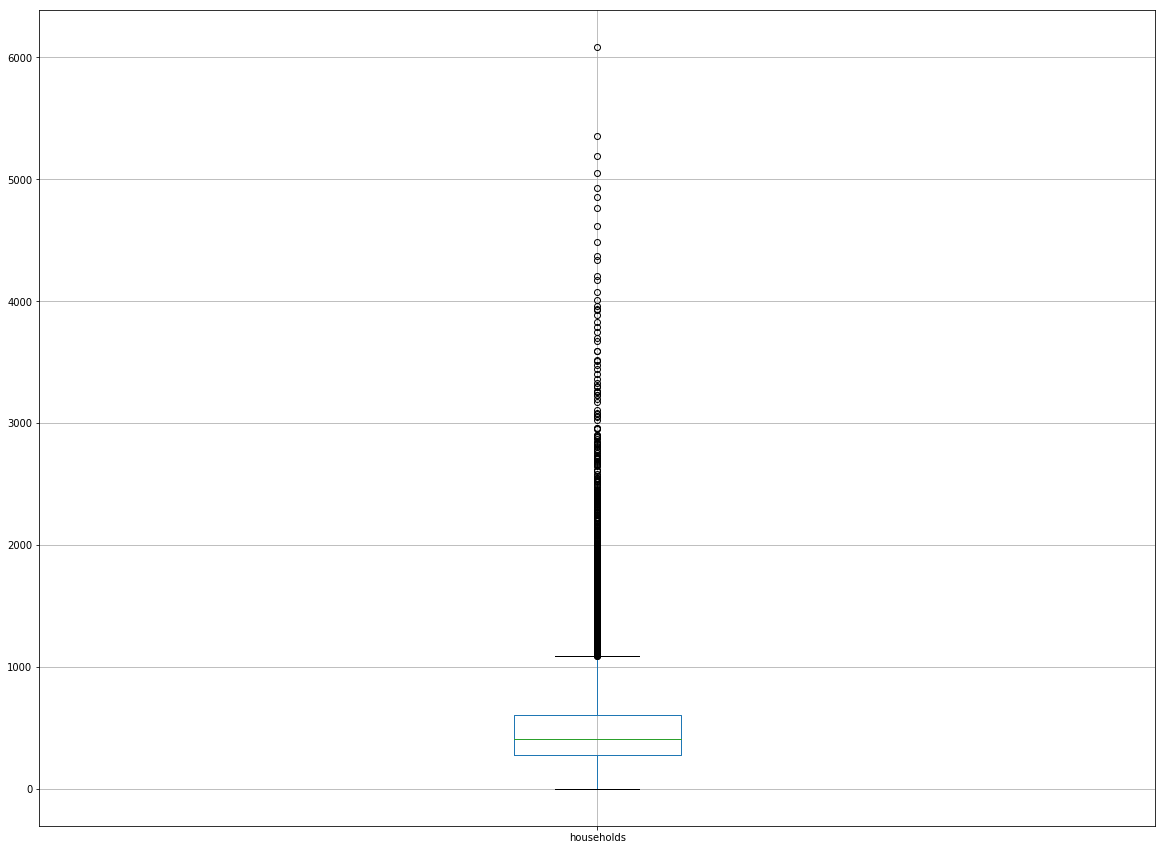

In [112]:
housing.boxplot(column='households', figsize=(20,15))

In [113]:
housing[housing['households'] > 3000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_househol
922,-121.92,37.53,7.0,28258.0,3864.0,12203.0,3701.0,8.4045,451100.0,<1H OCEAN,7.635234,0.136740,3.297217
1010,-121.73,37.68,17.0,20354.0,3493.0,8768.0,3293.0,5.4496,238900.0,INLAND,6.180990,0.171612,2.662618
1060,-121.88,39.74,12.0,14631.0,3298.0,7517.0,3262.0,1.6785,153100.0,INLAND,4.485285,0.225412,2.304414
3981,-118.60,34.19,16.0,14912.0,4183.0,5105.0,3302.0,2.8312,213900.0,<1H OCEAN,4.516051,0.280512,1.546033
4035,-118.52,34.17,20.0,17377.0,4457.0,7450.0,4204.0,3.2154,259600.0,<1H OCEAN,4.133444,0.256488,1.772122
5540,-118.43,33.96,16.0,14891.0,3984.0,6270.0,3595.0,5.1064,283200.0,<1H OCEAN,4.142142,0.267544,1.744089
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN,6.347327,0.165034,3.070693
6066,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,339700.0,<1H OCEAN,6.802554,0.150866,3.692780
6338,-117.88,33.96,16.0,19059.0,3079.0,10988.0,3061.0,5.5469,265200.0,<1H OCEAN,6.226397,0.161551,3.589677
8467,-118.34,33.91,12.0,9975.0,3638.0,7429.0,3405.0,2.6689,192300.0,<1H OCEAN,2.929515,0.364712,2.181791


Prenons par exemple la valeur de la ligne 8985 (voir image ci-dessous), on peut remarquer que la maison (household and not estate) est plutôt très chère pour une maison âgée de 21 an et avec comme nombre de chambre approximativement 4. Peut-être est-ce le problème??!!

<img src="outlier1.PNG">